In [1]:
# KUC, NLP

# Lec8.2

In [2]:
import pandas as pd
import numpy as np

In [ ]:

from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# original data
import pandas as pd
sms = pd.read_csv('sms-spam.csv',usecols= ['spam','text'])
print(sms.head())

   spam                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...


In [4]:
# processed
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]  # <2>
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
sms['spam'] = sms.spam.astype(int)


In [6]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

n_samples = 4837
n_features = 1000
n_components = 10
n_top_words = 5
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(sms.text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [7]:
print(tfidf_feature_names)


['00' '000' '02' '03' '04' '06' '0800' '08000839402' '08000930705' '0870'
 '10' '100' '1000' '10p' '11' '11mths' '12' '12hrs' '150' '150p' '150ppm'
 '16' '18' '1st' '20' '200' '2000' '2003' '2004' '20p' '250' '25p' '2day'
 '2lands' '2nd' '2nite' '30' '3030' '350' '4u' '50' '500' '5000' '50p'
 '5we' '750' '800' '8007' '86688' '87066' '87077' '900' 'abiola' 'able'
 'abt' 'ac' 'accept' 'access' 'account' 'actually' 'address' 'admirer'
 'aft' 'afternoon' 'age' 'age16' 'ago' 'ah' 'aight' 'al' 'alright' 'amp'
 'angry' 'ans' 'answer' 'anytime' 'apply' 'ard' 'area' 'asap' 'ask' 'askd'
 'asked' 'asking' 'ass' 'attempt' 'auction' 'available' 'await' 'award'
 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby' 'bad' 'balance' 'bank'
 'bath' 'bathe' 'bb' 'bcoz' 'beautiful' 'bed' 'believe' 'best' 'better'
 'big' 'birthday' 'bit' 'blood' 'blue' 'bluetooth' 'bonus' 'book' 'booked'
 'bored' 'boss' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring' 'brings'
 'brother' 'bslvyl' 'bt' 'bus' 'busy' 'buy' 'buying' 'call

In [8]:
# another implementation with more visualization

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [9]:
import matplotlib.pyplot as plt
# plot_top_words, see sklearn documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    # plt.show()
    plt.savefig('topics.png')


Task1: understand the function: plot_top_words
Task2: change the value of the number of topics and the number of top words, and then visualize in the plots
Task3: save the function, and make change to visualize your tasks of future topic modellings

[[1.41367346 0.63395335 0.10152947 ... 3.05175909 0.34702876 0.10193299]
 [0.10122334 0.10327583 0.10140408 ... 0.11584133 0.71777174 0.10124386]
 [0.10130411 0.10099988 0.10127382 ... 0.10182899 0.10145687 0.10114552]
 ...
 [0.38677758 4.07760927 1.82844846 ... 1.17336508 0.40464654 0.1011747 ]
 [0.10127036 0.89461513 0.10137933 ... 0.1012432  0.10134619 0.10188499]
 [0.1034425  0.10130994 0.10138849 ... 0.10139474 0.10141954 0.10104939]]


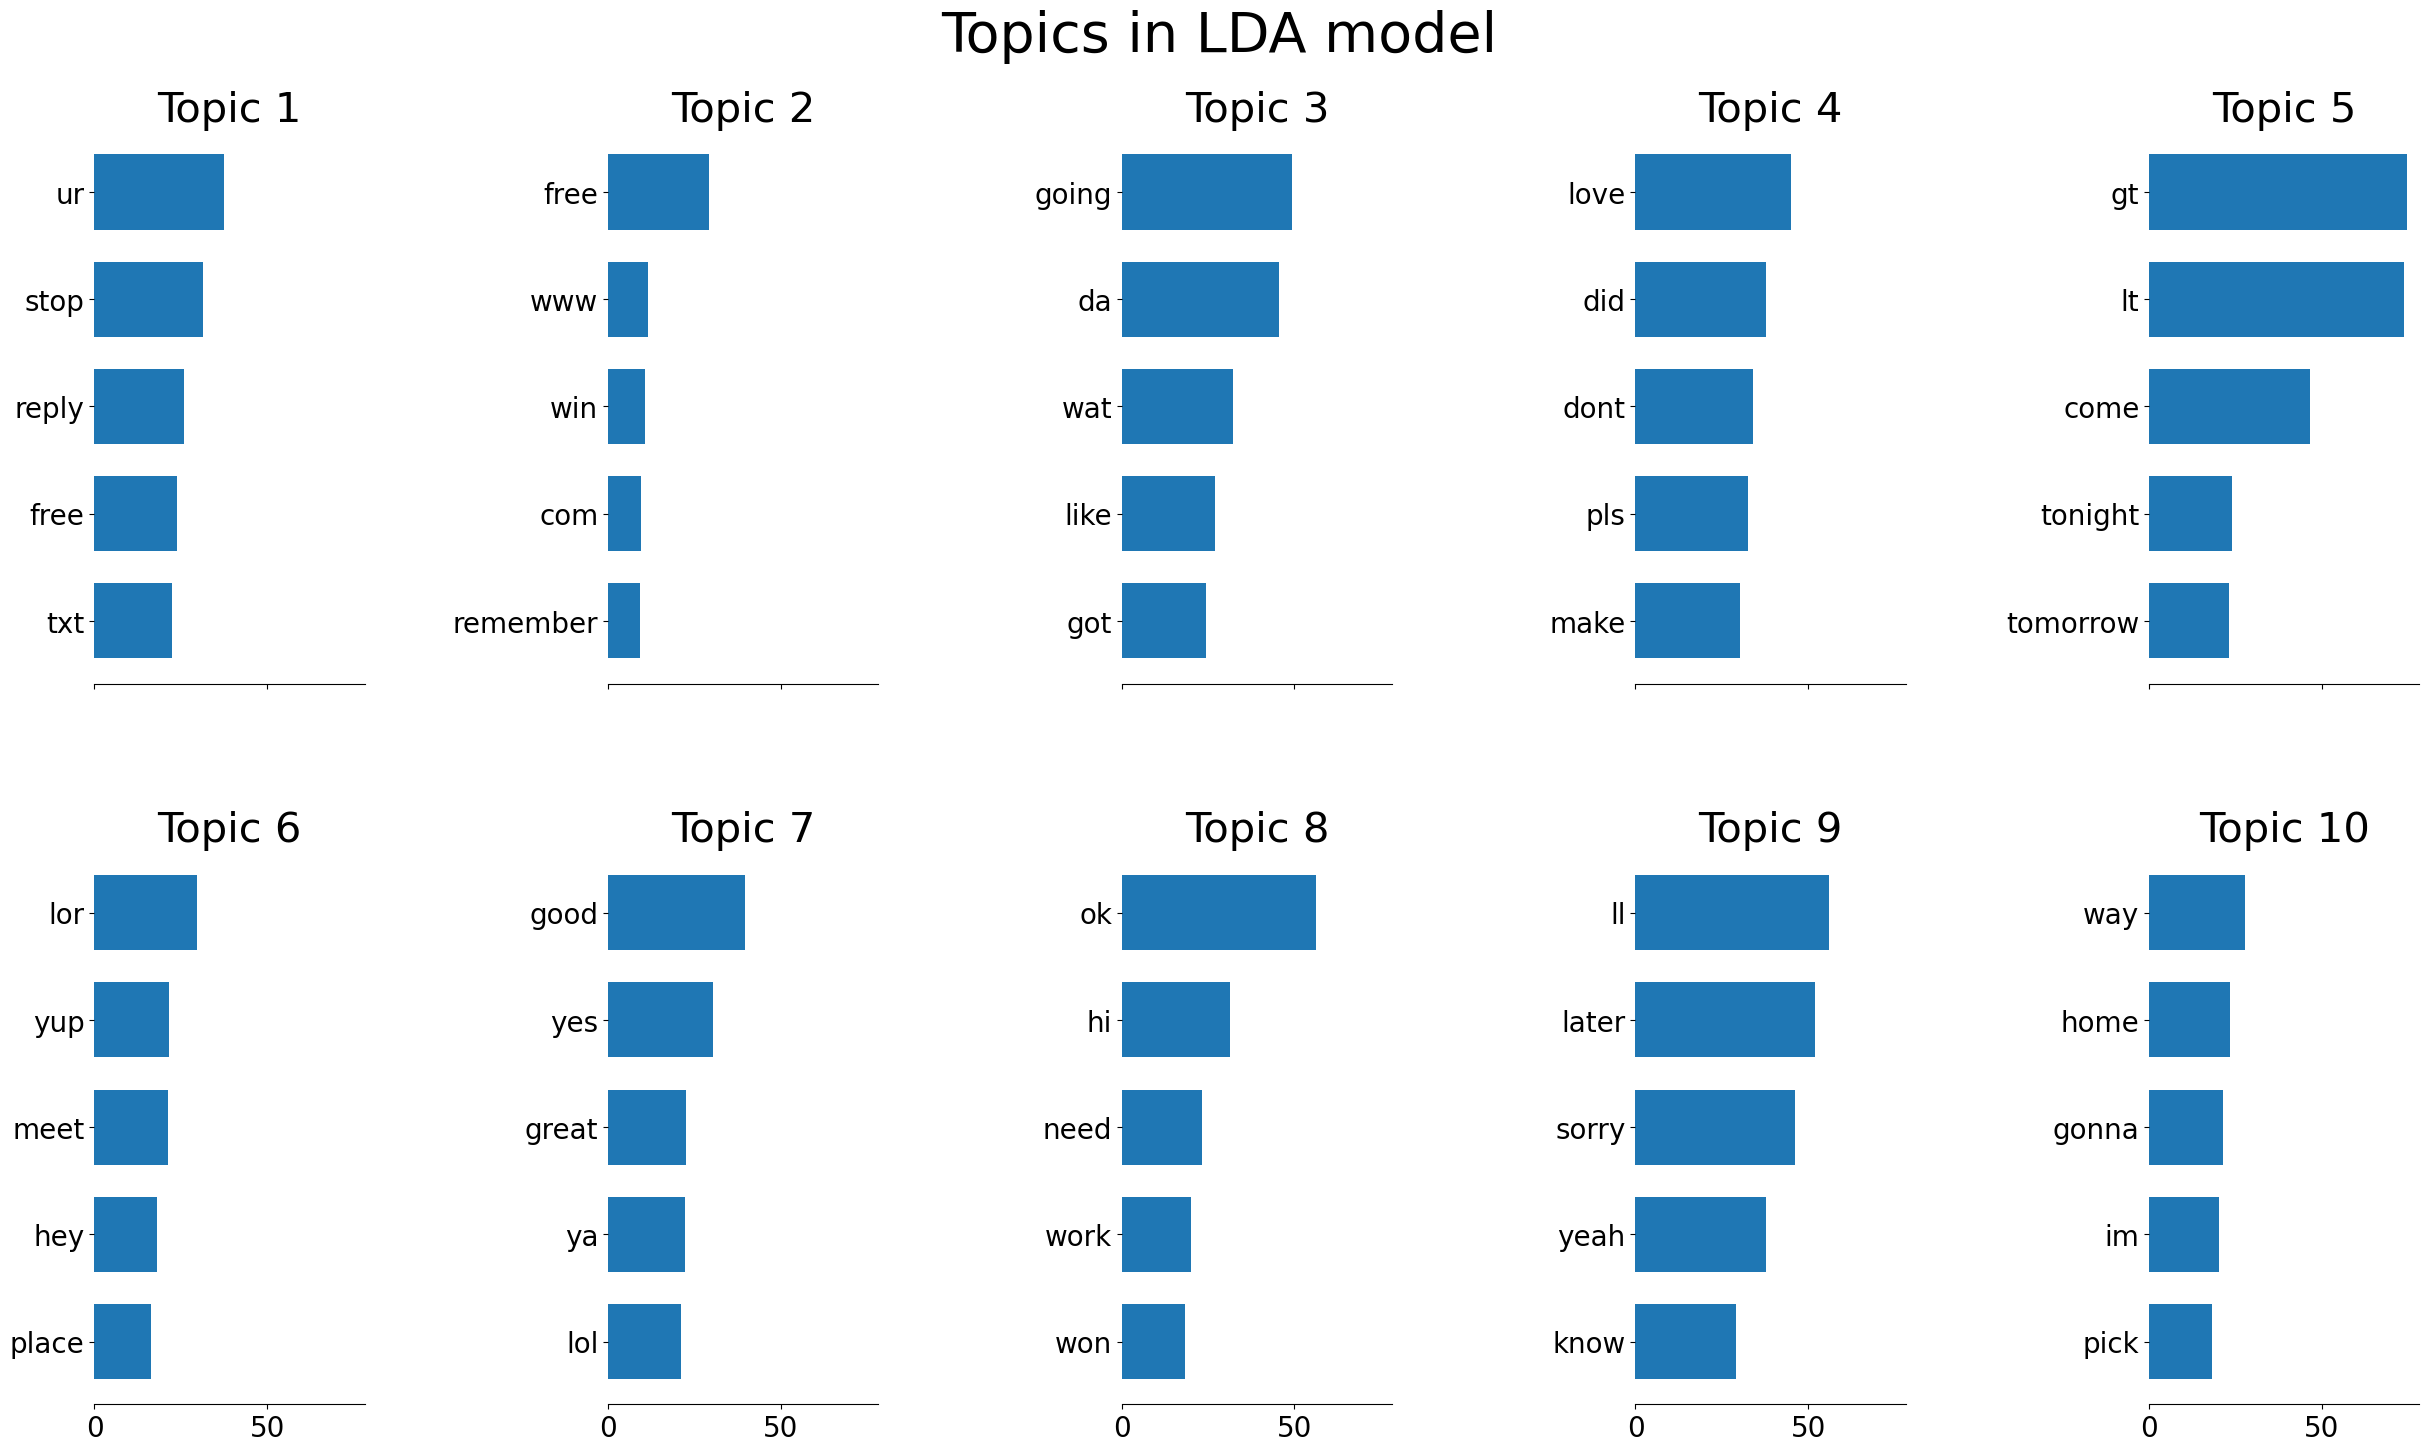

In [10]:
print(lda.components_)
%matplotlib inline
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics in LDA model")